#Intro to Deep Learning: Neural Networks from Scratch


We are importing 3 libraries:
- Pytorch --> Pytorch is the deep learning framework that is used for any deep learning tasks. Although we can let pytorch do the backpropagation for us, we will implement it ourselves from scratch to see how it works.

- Matplotlib --> To help vizualize our data and view graphs for the loss.

- Numpy --> To help manipulate arrays and plot them using matplotlib.

In [208]:
import torch
import matplotlib.pyplot as plt
import numpy as np

Run the code below to pick how many inputs and outputs you want for this example.

In [314]:
num_inputs = int(input("Enter the number of inputs you want"))
num_outputs = int(input("Enter the number outputs you want"))

Enter the number of inputs you want100
Enter the number outputs you want50


For the sake of this example, we can make our own random dataset.
torch.randn() takes input as the shape of the data we want to create.
The reason why the 1 is first is to represent the batch_size.
Normally, datasets contain thousands, even millions of samples and models are trained using batches of the data.
To keep things simple, we'll just have a one sample dataset(which is not a good idea in the real world!)

In [325]:
x = torch.randn(1, num_inputs)
y = torch.randn(1, num_outputs)

For this neural network, we will use two linear(hidden) layers.

Remember that each linear(hidden) layer contains a weight matrix num_inputs * num_outputs. The num_outputs of the first linear layer should equal the num_inputs of the second linear layer.

In [324]:
w1 = torch.randn(50, num_inputs)
b1 = torch.randn(50)

w2 = torch.randn(num_outputs, 50)
b2 = torch.randn(num_outputs)

The ReLU activation that clips all values below 0 to equal 0.

In [306]:
def relu(x):
  return torch.clip(x, min=0)

Run the code below to enter how many epochs you want.
Epoch is the term used in deep learning that just means how many times you want to tweak the model's weights. To begin with, enter 10 as the number of epochs.

In [273]:
num_epochs = int(input("Enter the number of epochs"))

Enter the number of epochs10


Run the code below to enter the learning rate you want. Learning rate is basically how much of the slope do you want to use to tweak the model's weights. Essentially, how fast the model's weights will approach the minimum error. However, you will see that having a higher learning rate may not always be the best idea. To begin with, enter 0.00001 as the learning rate. This is around the range that you will see the learning rates in the real world.

In [323]:
learning_rate = float(input("Enter the learning rate"))

Enter the learning rate0.00001


The next bit is a tad bit complex so a few notes:

- @ is basically computing the dot product of the inputs with the weights in the hidden layer
- dot product is the the sum of the products inputs * weights

- .t() is taking the transpose of a matrix. Transpose basically just means switching the dimensions of the matrix.

- For the slope calculation, we are using the chain rule and the power rule to compute the derivatives(another word for slope!) of the weights and biases

- .size(0) is just the number of elements(numbers) in the first dimension

(If you really want to understand the calculation behind the slopes, then look into partial derviatives, gradients, and chain rule. If you take the time to learn it, then it should not be that complicated to understand)

In [326]:
losses = []

for _ in range(num_epochs):

    # Forward pass
    h1 = x @ w1.t() + b1
    h1_relu = relu(h1)  # Apply ReLU activation
    h2 = h1_relu @ w2.t() + b2

    # Calculate the loss/error
    loss = torch.mean((h2 - y) ** 2)

    # Calculate the slopes at each step in the network
    dw2 = (2 / y.size(0)) * ((h2 - y).t() @ h1_relu)
    db2 = (2 / y.size(0)) * torch.sum(h2 - y, dim=0)

    dh1_relu = (h2 - y) @ w2  # Slope at the ReLU layer
    dh1 = dh1_relu * (h1 > 0).float()  # Applying the slope of the ReLU function

    dw1 = (2 / y.size(0)) * (dh1.t() @ x)
    db1 = (2 / y.size(0)) * torch.sum(dh1, dim=0)

    # Update parameters
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    # For plotting our loss graph later
    losses.append(loss)

This segment of the code just shows the loss graph. If our model trained correctly, we should see the loss go down to a certain minimum and then sort of flatten out.

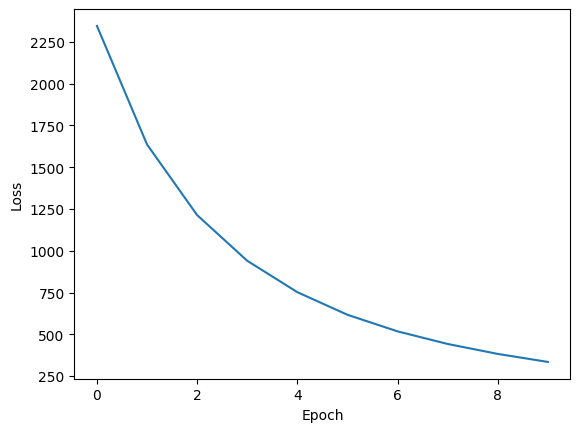

In [327]:
plt.plot([i for i in range(len(losses))], np.array([loss.detach() for loss in losses]))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()